In [33]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import hypertools as hyp 
from sklearn.linear_model import LogisticRegression # to apply the Logistic regression
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.model_selection import GridSearchCV# for tuning parameter
from sklearn.ensemble import RandomForestClassifier # for random forest classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm # for Support Vector Machine
from sklearn import metrics # for the check the error and accuracy of the model

%matplotlib inline

pd.set_option('display.max_columns', 100)

In [34]:
df= pd.read_csv('./data/Breast Cancer Wisconsin.csv',  index_col= None, na_values='?')
df.head(6)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN


# Data Preprocessing

In [35]:
df.shape

(569, 33)

In [36]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [37]:
df.drop('Unnamed: 32', axis=1 , inplace=True)
df.shape

(569, 32)

In [38]:
df.drop('id', axis=1 , inplace=True)
df.shape

(569, 31)

In [39]:
df["diagnosis"].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

# Data Visualization

**Syntax Pair Plot
sns.pairplot(data, hue=None, hue_order=None, palette=None, vars=None, x_vars=None, y_vars=None, kind='scatter', diag_kind='hist', markers=None, size=2.5, aspect=1, dropna=True, plot_kws=None, diag_kws=None, grid_kws=None)

**Syntax Pair Grid
sns.pairplot(data, hue=None, hue_order=None, palette=None, hue_kws=None, vars=None, x_vars=None, y_vars=None, diag_sharey=True, size=2.5, aspect=1, despine=True, dropna=True)

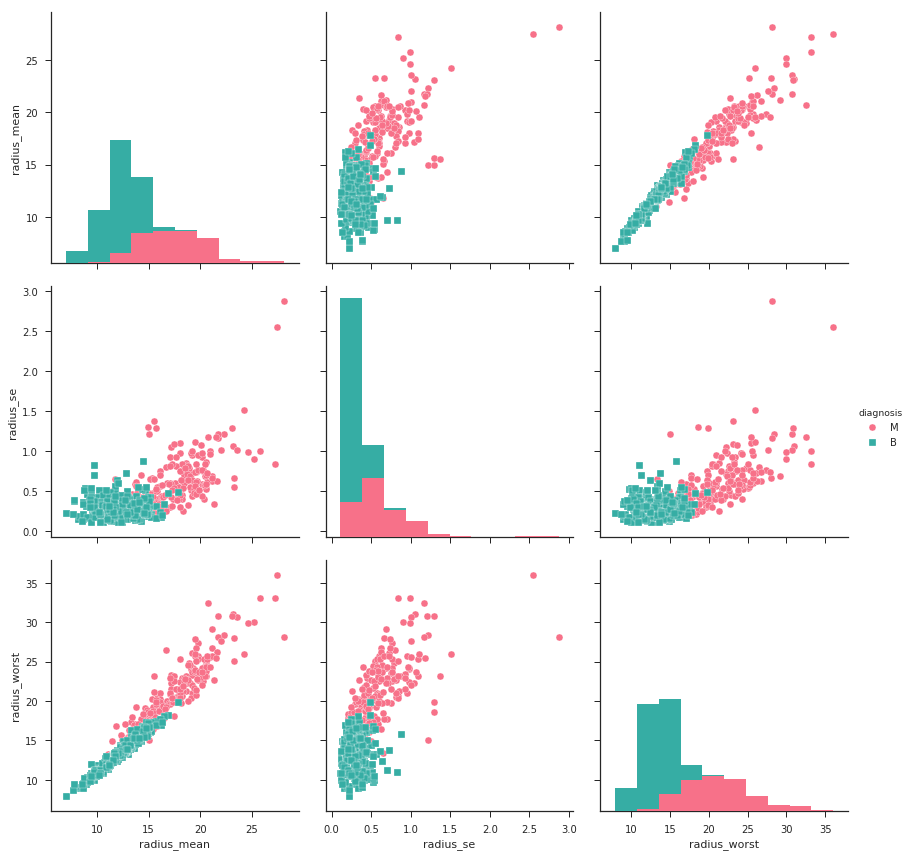

In [40]:
radius = df[['radius_mean','radius_se','radius_worst','diagnosis']]
sns.pairplot(radius, hue='diagnosis',palette="husl", markers=["o", "s"],size=4)

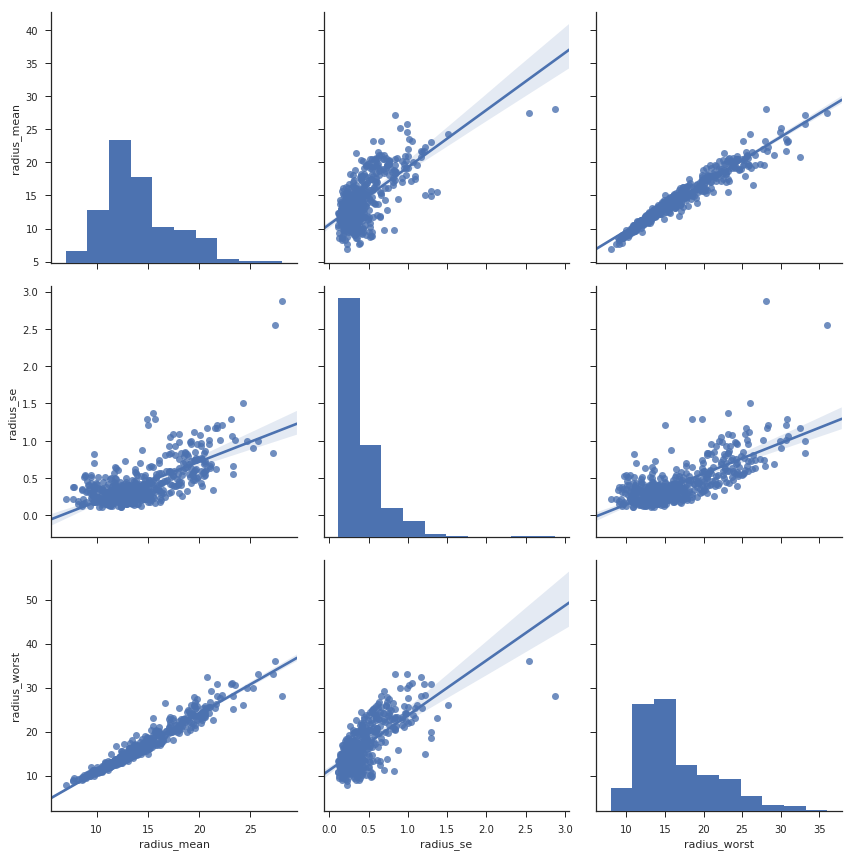

In [41]:
sns.pairplot(radius,kind="reg",size=4)

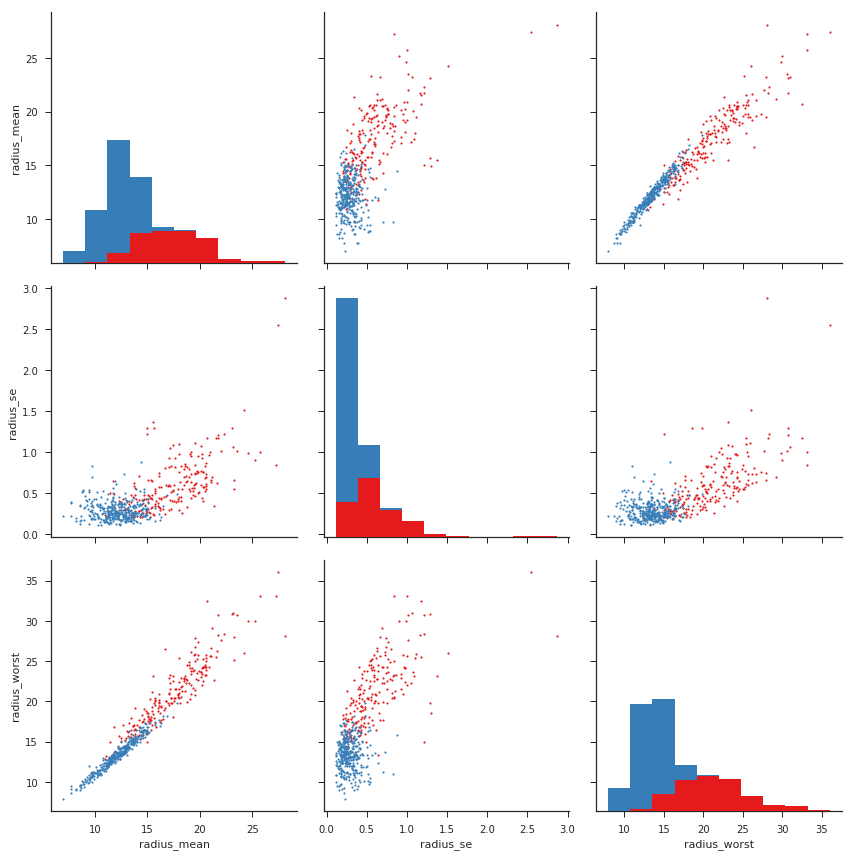

In [42]:
g = sns.PairGrid(radius,hue='diagnosis', palette="Set1",size=4)
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter, s = 3)

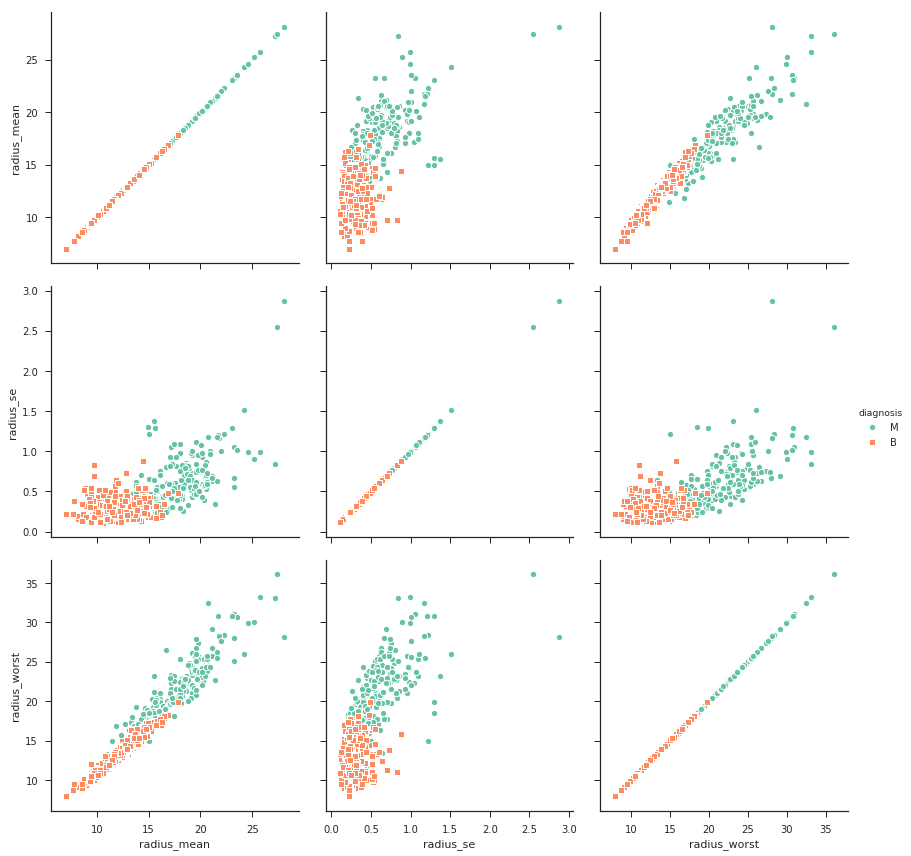

In [43]:
g = sns.PairGrid(radius, hue="diagnosis", palette="Set2",size=4,hue_kws={"marker": ["o", "s"]})
g = g.map(plt.scatter, linewidths=1, edgecolor="w", s=40)
g = g.add_legend()

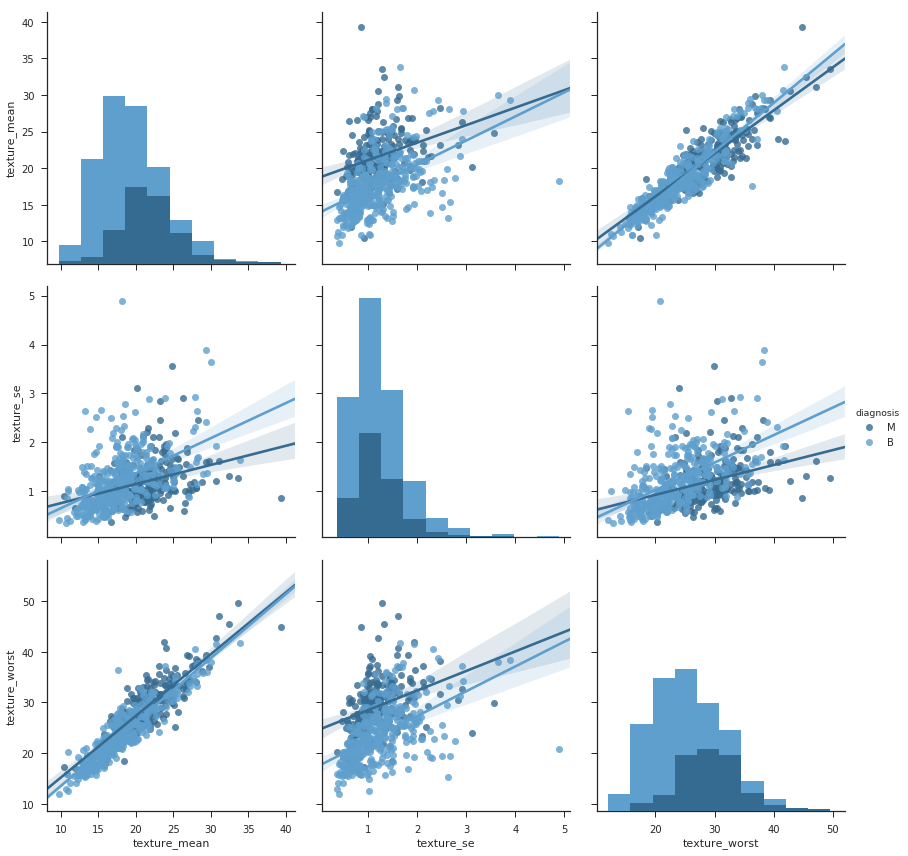

In [44]:
texture = df[['texture_mean','texture_se','texture_worst','diagnosis']]
sns.pairplot(texture, hue='diagnosis', palette="Blues_d",size=4, kind="reg")

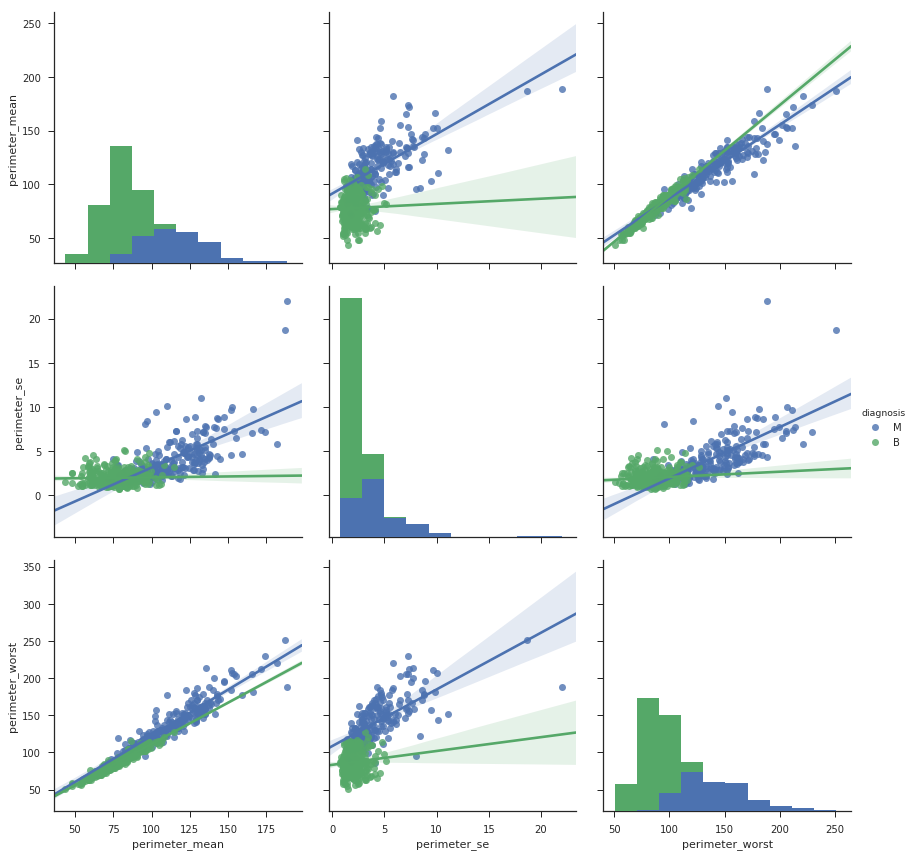

In [45]:
perimeter = df[['perimeter_mean','perimeter_se','perimeter_worst','diagnosis']]
sns.pairplot(perimeter, hue='diagnosis', size = 4, kind="reg")

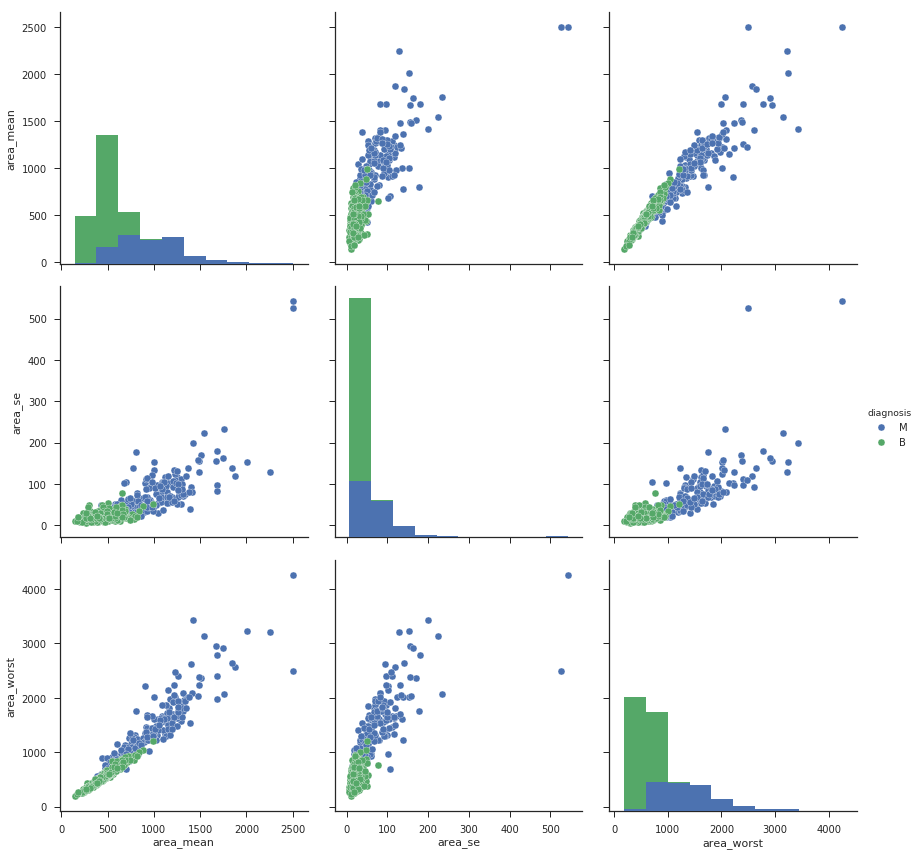

In [46]:
area = df[['area_mean','area_se','area_worst','diagnosis']]
sns.pairplot(area, hue='diagnosis', size =4)

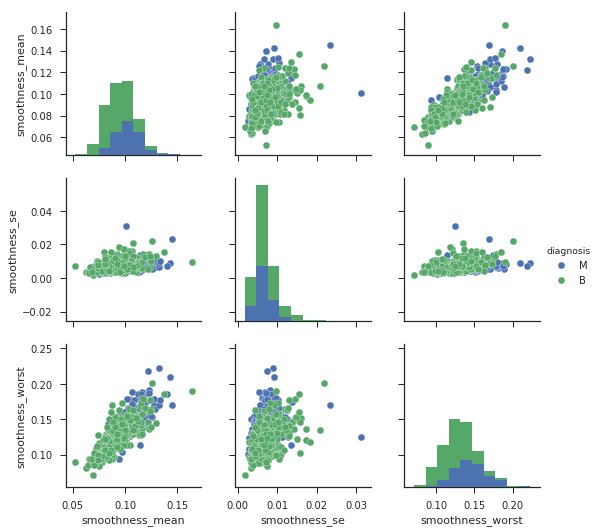

In [47]:
smoothness = df[['smoothness_mean','smoothness_se','smoothness_worst','diagnosis']]
sns.pairplot(smoothness, hue='diagnosis')

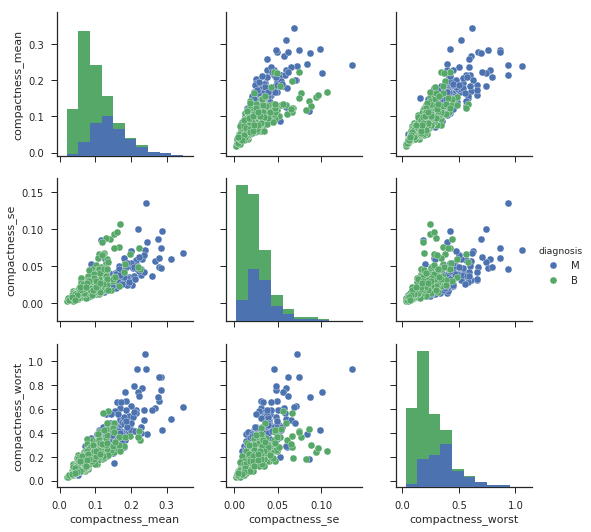

In [48]:
compactness = df[['compactness_mean','compactness_se','compactness_worst','diagnosis']]
sns.pairplot(compactness, hue='diagnosis')

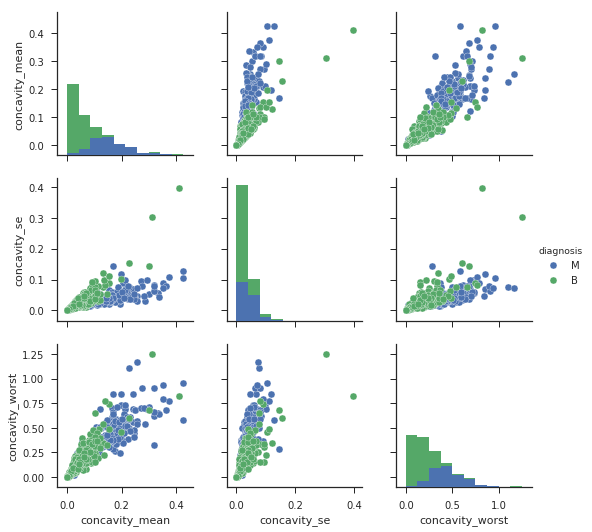

In [49]:
concavity = df[['concavity_mean','concavity_se','concavity_worst','diagnosis']]
sns.pairplot(concavity, hue='diagnosis')

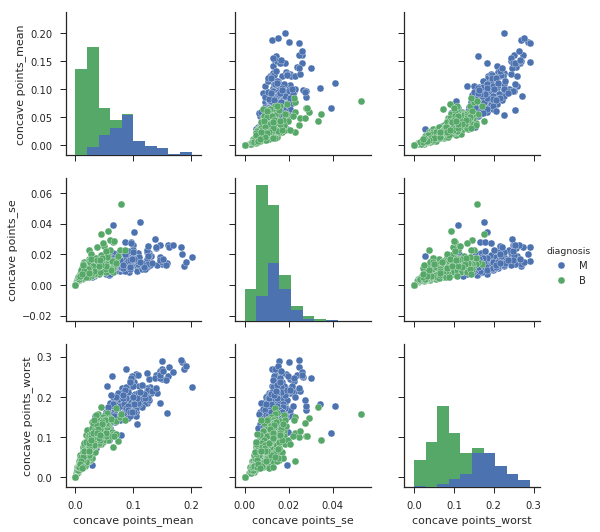

In [50]:
concave_points = df[['concave points_mean','concave points_se','concave points_worst','diagnosis']]
sns.pairplot(concave_points, hue='diagnosis')

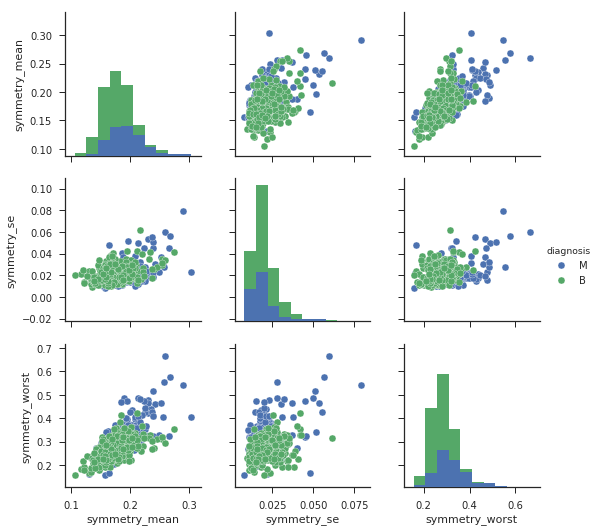

In [51]:
symmetry = df[['symmetry_mean','symmetry_se','symmetry_worst','diagnosis']]
sns.pairplot(symmetry, hue='diagnosis')

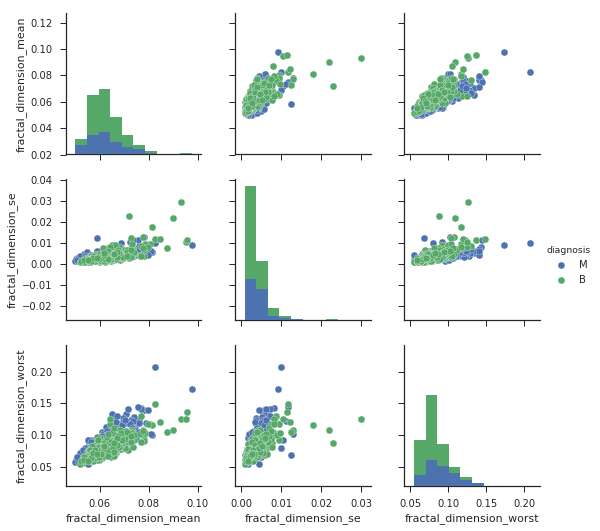

In [52]:
fractal_dimension = df[['fractal_dimension_mean','fractal_dimension_se','fractal_dimension_worst','diagnosis']]
sns.pairplot(fractal_dimension, hue='diagnosis')

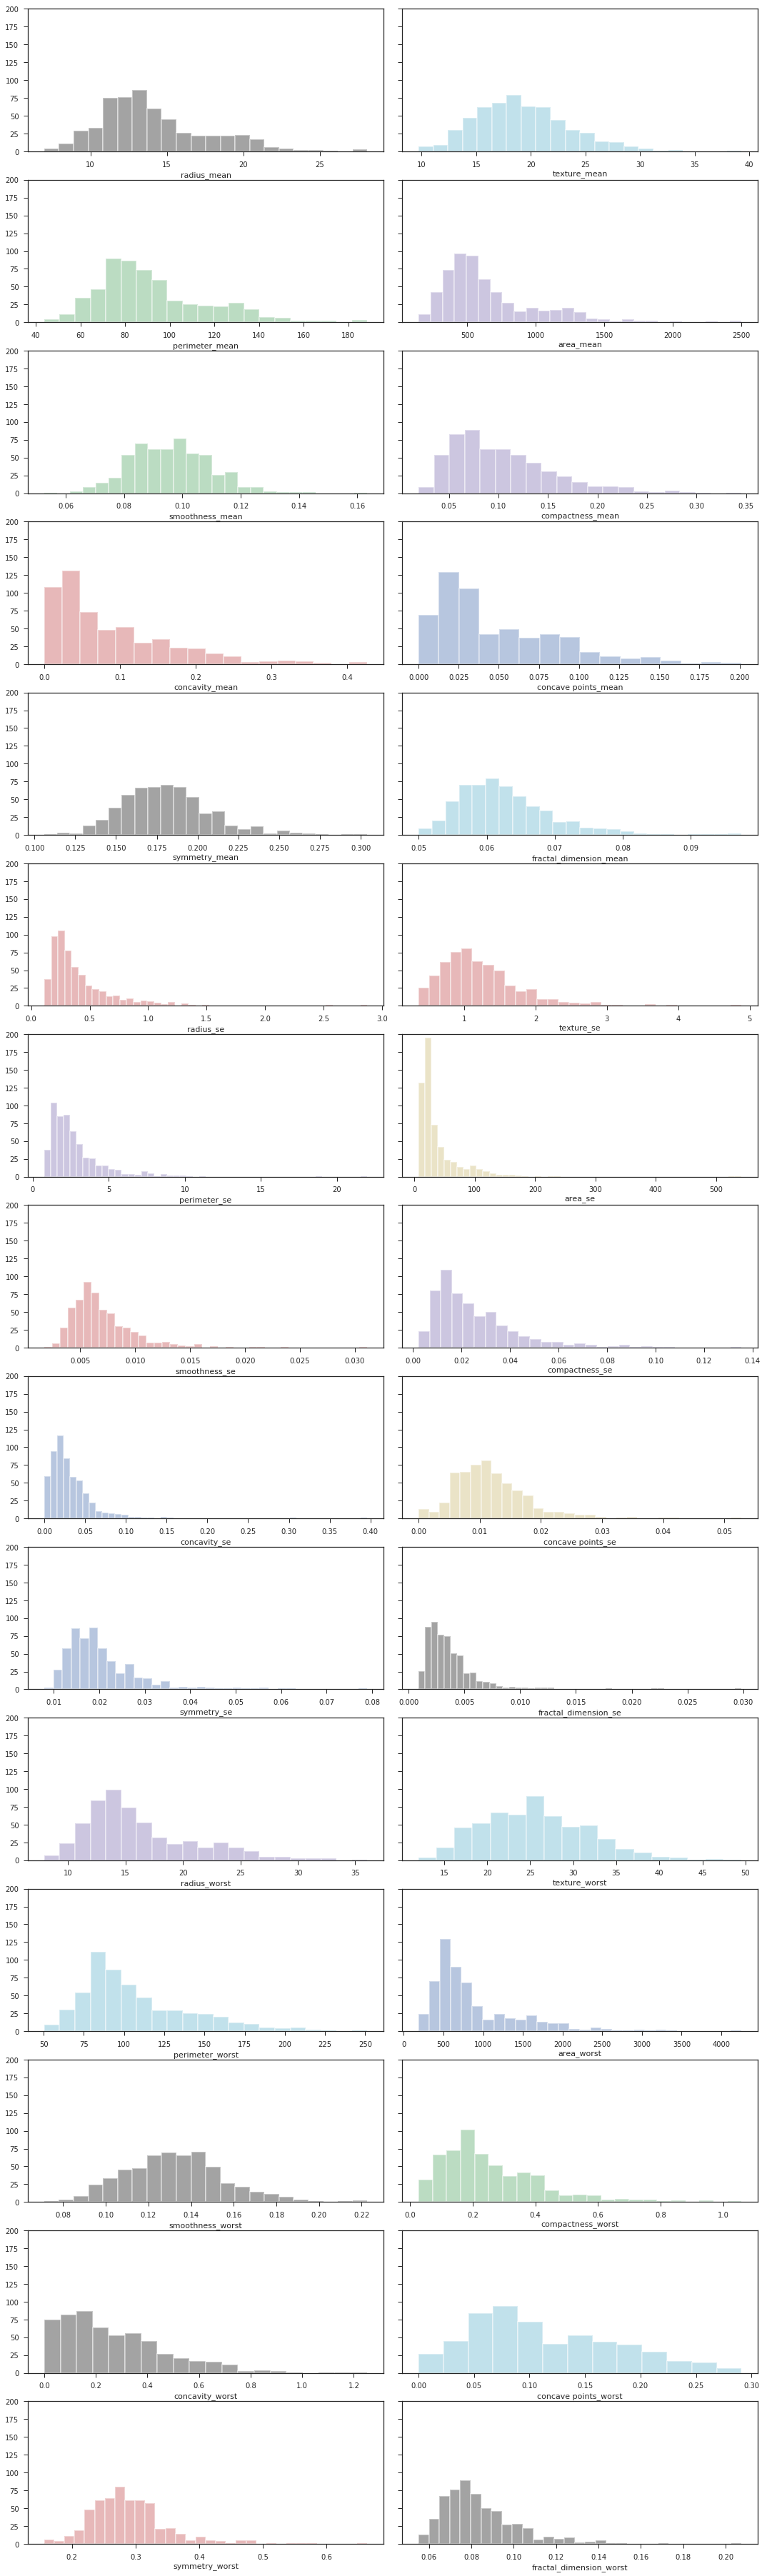

In [53]:
# Move the reponse variable "diagnosis" to the end of the dataframe
end = df['diagnosis']
df.drop(labels=['diagnosis'], axis=1,inplace = True)
df.insert(30, 'diagnosis', end)
df.head()

def categorical_to_numeric_diagnosis(x):
    if x=='M':
        return 1
    if x=='B':
        return 0

df['diagnosis']= df['diagnosis'].apply(categorical_to_numeric_diagnosis)
df["diagnosis"].value_counts()


colors = np.array('b g r c m y k'.split()) #Different colors for plotting

fig,axes = plt.subplots(nrows =15,ncols=2, sharey=True,figsize = (15,50))
plt.tight_layout()
row = 0
iteration = 0
for j in range(0,len(df.columns[:-1])):
    iteration+=1
    if(j%2==0):
        k = 0
    else:
        k = 1
    sns.distplot(df[df.columns[j]],kde=False,hist_kws=dict(edgecolor="w", linewidth=2),color = np.random.choice(colors) ,ax=axes[row][k])
    if(iteration%2==0):
        row+=1
        plt.ylim(0,200)

In [55]:
#The features looks like they are broken into three main categories, value means, standard deivations, and 'worst'. We can check to see if there are any correlations between these subsets of features
features_mean = df.columns[1:9]
features_se = df.columns[9:19]
features_worst = df.columns[1]

In [56]:
# Separate out malignant and benign data for graphing
malignant = df[df['diagnosis'] ==1]
benign = df[df['diagnosis'] ==0]

In [57]:

# Column names to observe in following graphs - mean values only
observe = list(df.columns[1:11]) + ['area_worst'] + ['perimeter_worst']
observables = df.loc[:,observe]

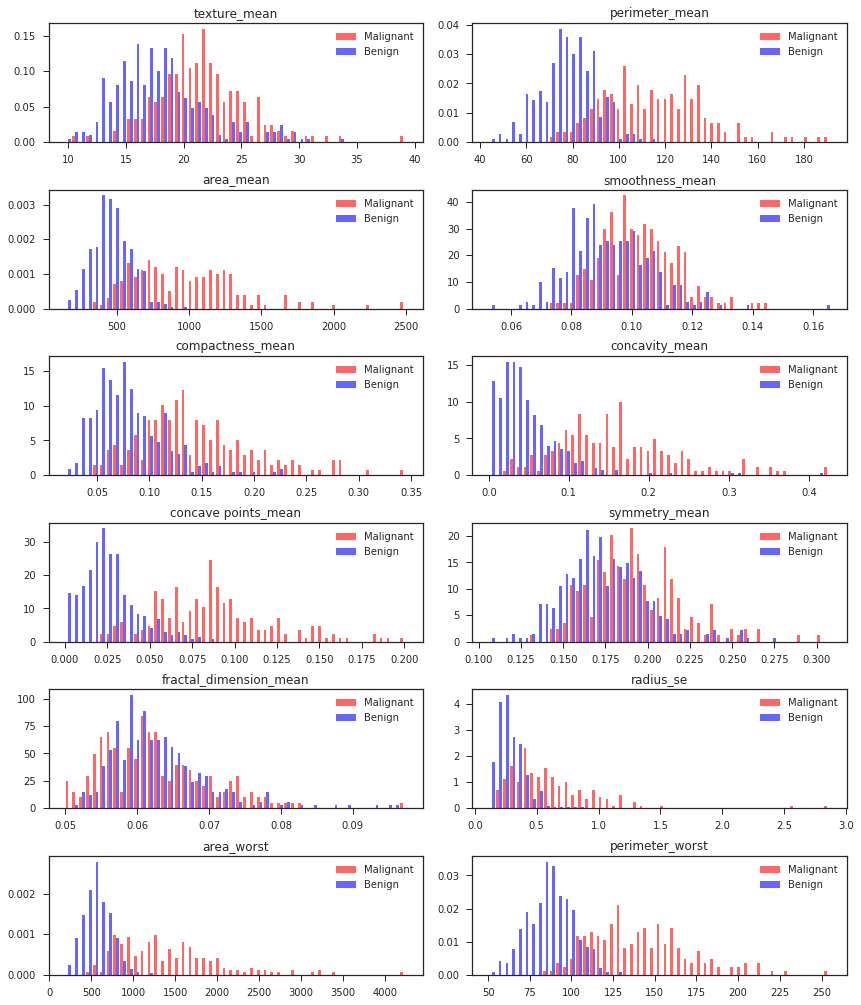

In [58]:
plt.rcParams.update({'font.size': 8})
plot, graphs = plt.subplots(nrows=6, ncols=2, figsize=(12,14))
graphs = graphs.flatten()
for idx, graph in enumerate(graphs):
    graph.figure
    
    binwidth= (max(df[observe[idx]]) - min(df[observe[idx]]))/50
    bins = np.arange(min(df[observe[idx]]), max(df[observe[idx]]) + binwidth, binwidth)
    graph.hist([malignant[observe[idx]],benign[observe[idx]]], bins=bins, alpha=0.6, normed=True, label=['Malignant','Benign'], color=['red','blue'])
    graph.legend(loc='upper right')
    graph.set_title(observe[idx])
plt.tight_layout()

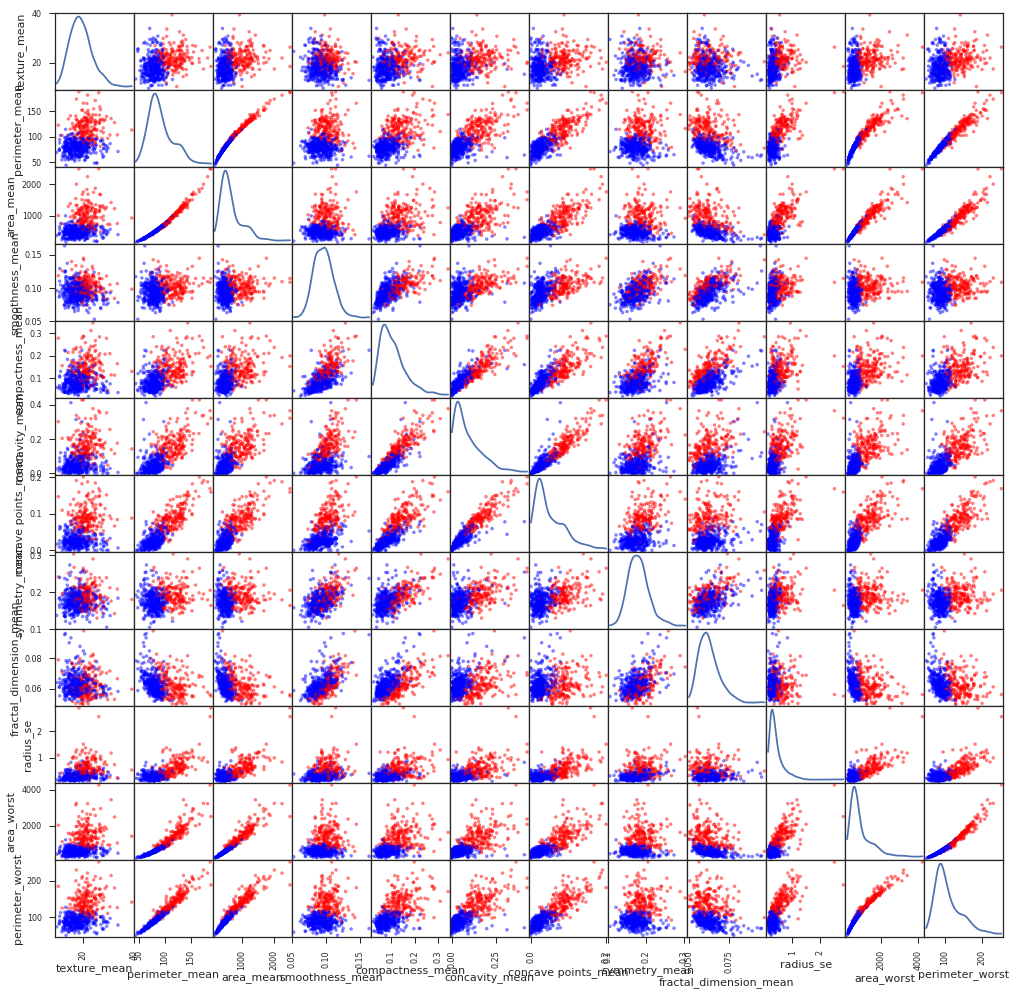

In [59]:
color_wheel = {0: "blue", 1: "red"}
colors = df["diagnosis"].map(lambda x: color_wheel.get(x))
pd.plotting.scatter_matrix(observables, c=colors, alpha = 0.5, figsize = (17, 17), diagonal = 'kde');